In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/home/ali/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data = pd.read_csv('Data/Datasets/weight-height.csv')

# EDA

In [3]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


10000 records 

In [5]:
data.nunique()

Gender        2
Height    10000
Weight    10000
dtype: int64

No two records have the same height and weight.  
So there's no duplicated rows

In [6]:
data.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

Half male and half female.

In [8]:
sns.set_style('whitegrid')

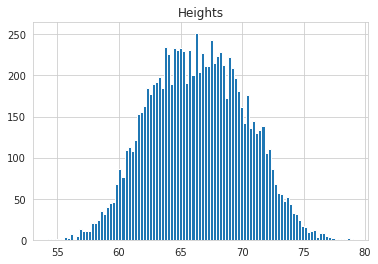

In [9]:
data.Height.hist(bins=100)
plt.title('Heights')
plt.show()

Height is reported in inches.

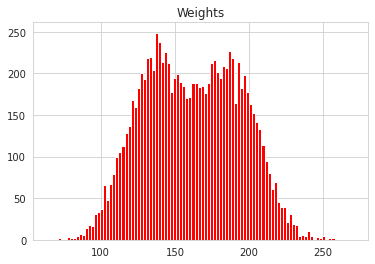

In [10]:
data.Weight.hist(bins=100, color='r')
plt.title('Weights')
plt.show()

Weight is reported in lbs.

In [11]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


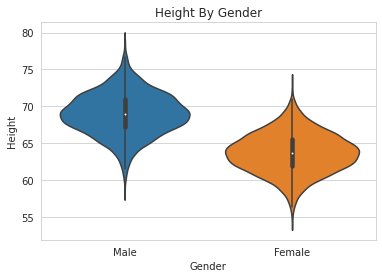

In [13]:
sns.violinplot(data=data, x='Gender', y='Height').set_title('Height By Gender');

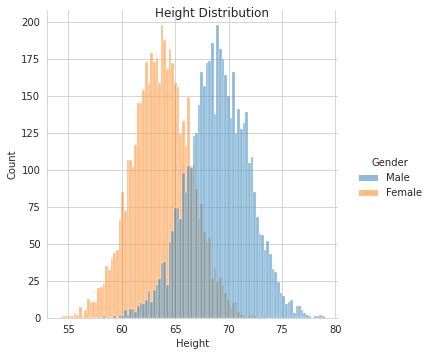

In [46]:
sns.displot(data=data, x='Height', hue='Gender', bins=100);
plt.suptitle('Height Distribution');

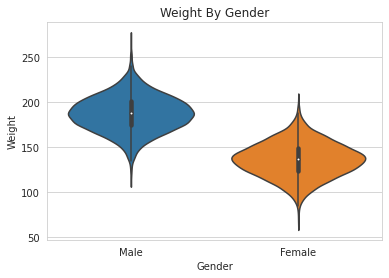

In [14]:
sns.violinplot(data=data, x='Gender', y='Weight').set_title('Weight By Gender');

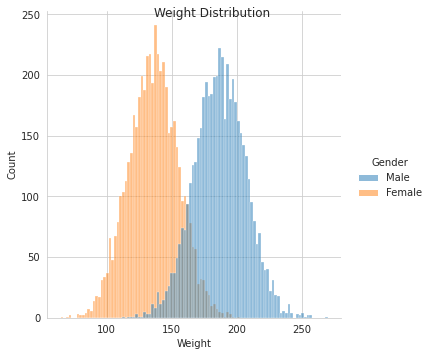

In [47]:
sns.displot(data, x='Weight', hue='Gender', bins=100);
plt.suptitle('Weight Distribution');

# Statistical Inferences

## Difference Between Genders

In [15]:
groups = data.groupby('Gender')
males = groups.get_group('Male')
females = groups.get_group('Female')

In [18]:
groups.describe()

Height                                                        \
         count       mean       std        min        25%        50%   
Gender                                                                 
Female  5000.0  63.708774  2.696284  54.263133  61.894441  63.730924   
Male    5000.0  69.026346  2.863362  58.406905  67.174679  69.027709   

                              Weight                                     \
              75%        max   count        mean        std         min   
Gender                                                                    
Female  65.563565  73.389586  5000.0  135.860093  19.022468   64.700127   
Male    70.988744  78.998742  5000.0  187.020621  19.781155  112.902939   

                                                        
               25%         50%         75%         max  
Gender                                                  
Female  122.934096  136.117583  148.810926  202.237214  
Male    173.887767  187.033546  200.357802  269.989699

In [19]:
stats.ttest_ind(males.Height, females.Height, equal_var=False)

Ttest_indResult(statistic=95.60271449148823, pvalue=0.0)

Null hypothesis can be rejected since pvalue is less than 5%.
Males are taller than females on average.

In [24]:
stats.ttest_ind(males.Weight, females.Height, equal_var=False)

Ttest_indResult(statistic=436.7578898014517, pvalue=0.0)

Males weigh more than females on average.

## Correlation

In [25]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


<AxesSubplot:>

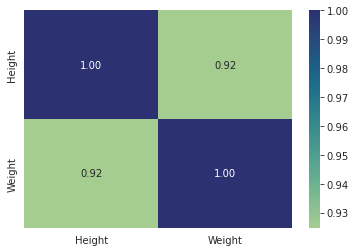

In [28]:
sns.heatmap(data.corr(), cmap='crest', annot=True, fmt='.2f')

As shown above, there's strong positive linear relationship between weight and height

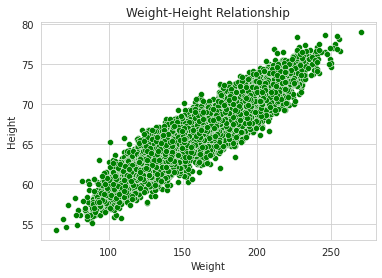

In [30]:
sns.scatterplot(data=data, x='Weight', y='Height', color='g').set_title('Weight-Height Relationship');

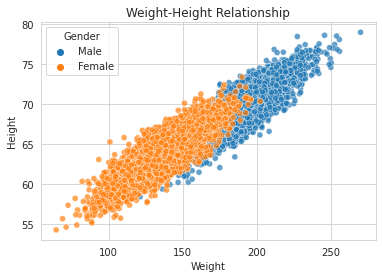

In [45]:
sns.scatterplot(data=data, x='Weight', y='Height',
                hue='Gender', alpha=0.7).set_title('Weight-Height Relationship');

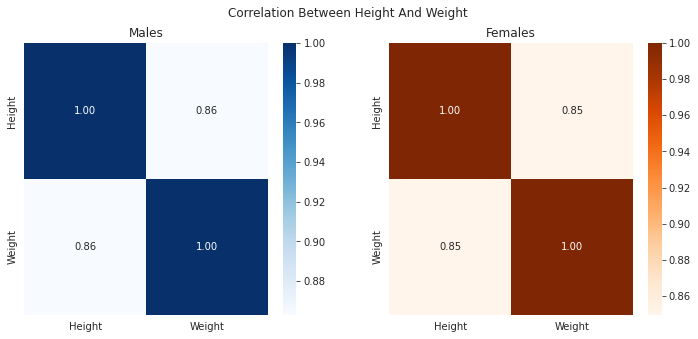

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(males.corr(), cmap='Blues', annot=True, fmt='.2f', ax=ax[0]).set_title('Males');
sns.heatmap(females.corr(), cmap='Oranges', annot=True, fmt='.2f', ax=ax[1]).set_title('Females');
plt.suptitle('Correlation Between Height And Weight')
plt.show()

## Normality Test

## Height

### Histogram

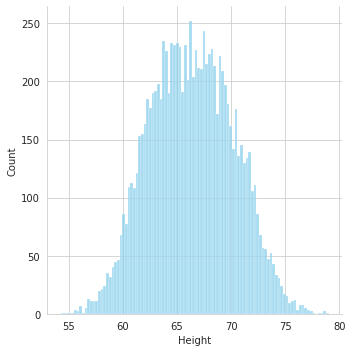

In [62]:
sns.displot(data=data, x='Height', bins=100, color='skyblue');

### QQ Plot

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([54.26313333, 54.61685783, 54.87372753, ..., 78.52821043,
         78.62137397, 78.99874235])),
 (3.8412964593344454, 66.36755975482124, 0.9980730765382864))

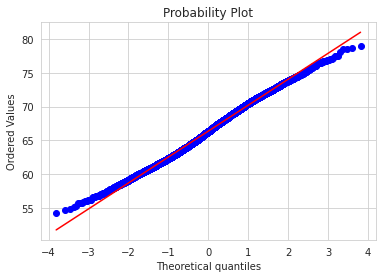

In [63]:
import pylab

stats.probplot(data.Height, dist='norm', plot=pylab)

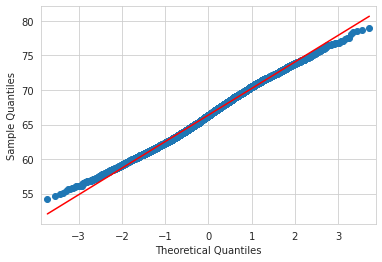

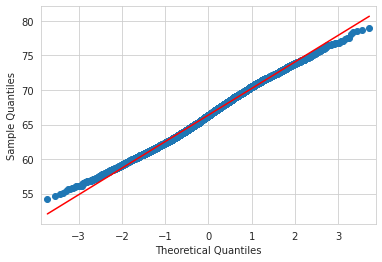

In [66]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data.Height, line='s')

As these plots show, Height follows normal distribution

### Shapiro Wilk Test

In [67]:
from scipy.stats import shapiro

shapiro(data.Height)

/home/ali/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9960622191429138, pvalue=8.158031071868303e-16)

These results show that Height doesn't follow normal distribution.  
Let's further investigate.

In [68]:
sample = data.sample(frac=1).sample(n=100)['Height']
shapiro(sample)

ShapiroResult(statistic=0.9841337203979492, pvalue=0.27458903193473816)

As we see by sampling this effect of large sample fades away and test shows the correct result.

### D'Agostino K2

In [69]:
# D'Agostino K2
stats.normaltest(data.Height)

NormaltestResult(statistic=169.41938520422465, pvalue=1.6257282003022323e-37)

In [70]:
stats.normaltest(sample)

NormaltestResult(statistic=0.5355224801202103, pvalue=0.7650904322427251)

Same result as the Shapiro Test.

### Anderson Test

In [76]:
stats.anderson(data.Height)

AndersonResult(statistic=12.000426461434472, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Up to significance level of 2.5 we can not reject the Null Hypothesis  
But in significance level of 1 H0 is rejected.

In [82]:
anderson_result = stats.anderson(data.Height)
anderson_result.critical_values < anderson_result.significance_level

array([ True,  True,  True,  True, False])

## Weight

### QQ Plot

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([ 64.70012671,  68.98253009,  71.39374874, ..., 255.69083484,
         255.86332649, 269.98969851])),
 (31.898253164823704, 161.44035683283076, 0.9931481214288358))

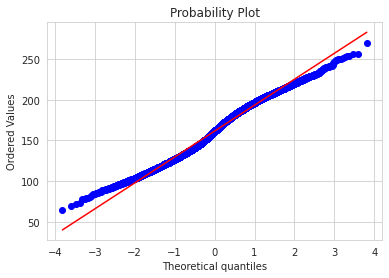

In [83]:
stats.probplot(data.Weight, dist='norm', plot=pylab)

### Histogram

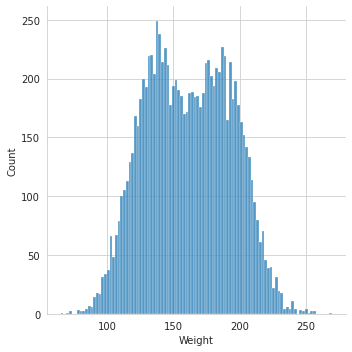

In [85]:
sns.displot(data=data, x='Weight', bins=100);

### Shapiro

In [86]:
stats.shapiro(data.Weight.sample(n=100))

ShapiroResult(statistic=0.9721382260322571, pvalue=0.03229602053761482)

Since pvalue is less than 0.05 null hypothesis(normality) can be rejected.  
But because plots show that population follows normal distribution, this test result is a Type-I
error(False Positive).

### D'Agostino K2

In [116]:
stats.normaltest(data.Weight.sample(n=100))

NormaltestResult(statistic=4.161009763781553, pvalue=0.12486715311686623)

H0 (Normality) can not be rejected.